In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
data['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [7]:
data.isnull().any().any()

False

In [8]:
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
length                                                                  
466       2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0      2.0   
197       5.0  2.800000  1.643168  1.0  2.00  2.0  4.00  5.0      5.0   
225       3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      3.0   
334       1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
26       24.0  4.583333  1.017955  1.0  5.00  5.0  5.00  5.0     24.0   
1835      1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0      1.0   
620       2.0  3.000000  2.828427  1.0  2.00  3.0  4.00  5.0      2.0   
978       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
125       8.0  4.375000  0.517549  4.0  4.00  4.0  5.00  5.0      8.0   
50       21.0  4.904762  0.300793  4.0  5.00  5.0  5.00  5.0     21.0   

                                                       
            mean       std  min   25%  50%   75%  max  
length                                                 
466     0.000000  0.000000  0.0  0.00  0.0  0.00  0.0  
197     0.400000  0.547723  0.0  0.00  0.0  1.00  1.0  
225     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
334     0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
26      0.916667  0.282330  0.0  1.00  1.0  1.00  1.0  
1835    1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
620     0.500000  0.707107  0.0  0.25  0.5  0.75  1.0  
978     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
125     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
50      1.000000  0.000000  1.0  1.00  1.0  1.00  1.0

In [9]:
data.groupby('rating').describe() 

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [10]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

<h3>DATA VISUALISATION</h3>

<h4> Distribution of Ratings for Alexa </h4>

In [11]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'blue', 'aqua', 'gold', 'red']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

By looking at the pie chart above, we can conclude that most of the ratings are positive for alexa. 72.6% customers have given Alexa a 5 star rating. 14.4% customers have given Alexa a 4 Star rating. That means that 87% of the customers have given alexa at least a good rating.

4.38% of customers have given Alexa a rating of 3 stars. 3.05% of customers appear to not like Alexa as much as the other customers and chose to give only a 2-star rating to Alexa, whereas 5.11% people did not like Alexa and decided to give only 1-star rating. This feedback shows a total of 8.16% of the customers were not satisfied with Alexa.

Overall, the ratings feedback is very positive, showing almost 90% of the customers being very satisfied with the product.

<h4> Distribution of Variation of Alexa </h4>

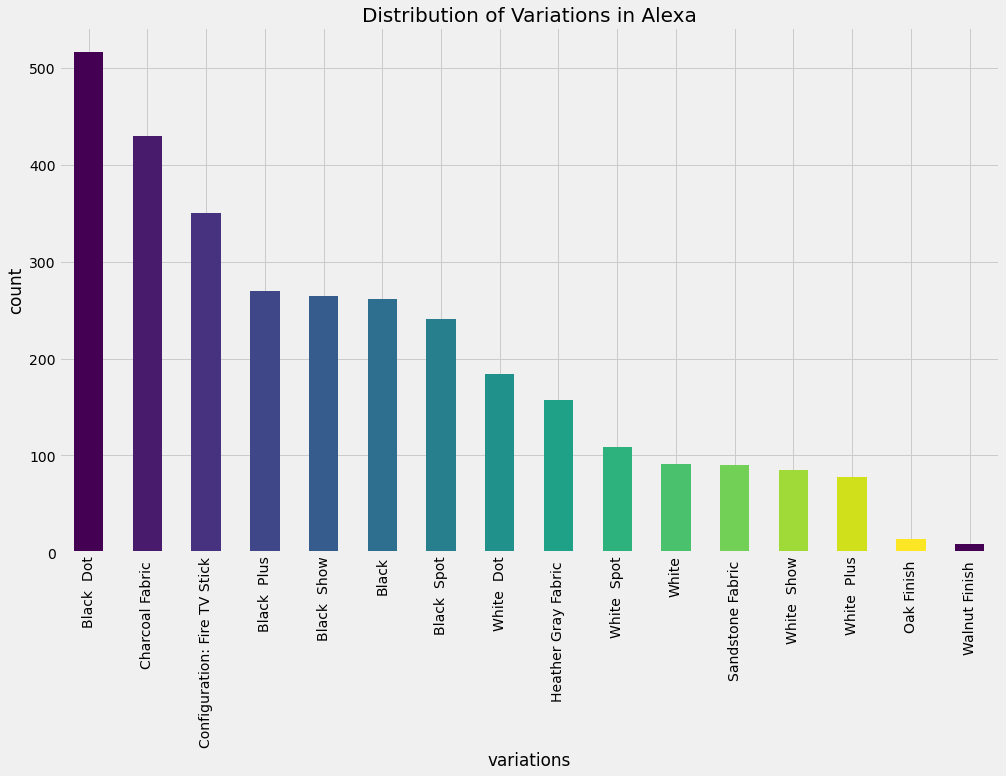

In [12]:
color = plt.cm.viridis(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [13]:
data['variation'].nunique()

16

One of the columns in our dataset is called “variations”. The bar chart shows all the different variations of Amazon’s Alexa and their popularity as well. We see that there are 16 different variations of Alexa models. It goes from Black Dot all the way to Walnut Finish. It is clear that Black Dot is the most popular variation of Alexa with more than 500 units out of the 3150 samples in the dataset.

Black Dot, Charcoal Fabric and Configuration: Fire TV Stick are the most popular models of Amazon’s Alexa. Oak Finish and Walnut Finish are the least popular variations

<h3> Distribution of feedbacks for Alexa </h3>

In [14]:
feedbacks = data['feedback'].value_counts()
label_feedback = feedbacks.index
size_feedback = feedbacks.values
colors = ['darkblue', 'aqua']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

<h3> Distribution of length in Reviews </h3>

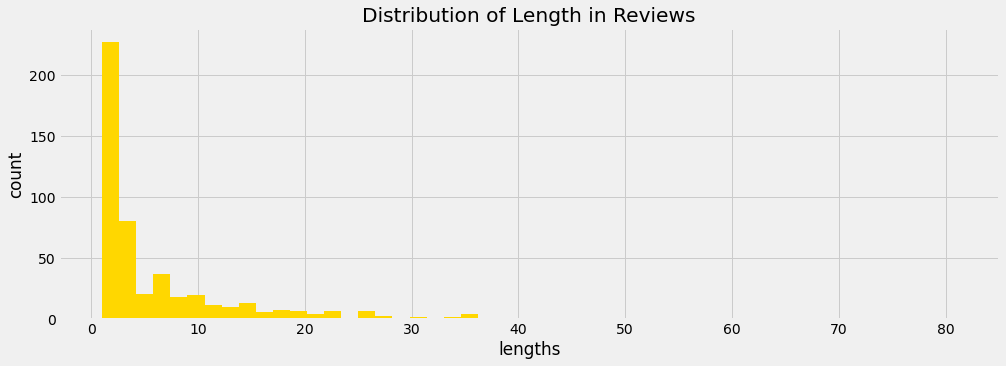

In [15]:
data['length'].value_counts().plot.hist(color = 'gold', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

The above Distribution Plot shows the distribution of the length of the reviews written by the customers. This shows what is the average of the length of the reviews written by the customers of Amazon's Alexa. Most of the Reviews are very short, written in less than 3 words total. We can see that most customers write reviews that are between 5 to 20 words long.

Very few customers write reviews that are longer than 30 words.

Let's Check some of the reviews according to thier lengths

In [16]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [17]:
data[data['length'] == 15]['verified_reviews'].iloc[0]

'Amazing product'

In [18]:
data[data['length'] == 35]['verified_reviews'].iloc[0]

'"Good quality, great sound quality"'

In [19]:
data[data['length'] == 2853]['verified_reviews'].iloc[0]

'"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It\'s no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free P

In [20]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

 <h3> Bivariate Analysis </h3>

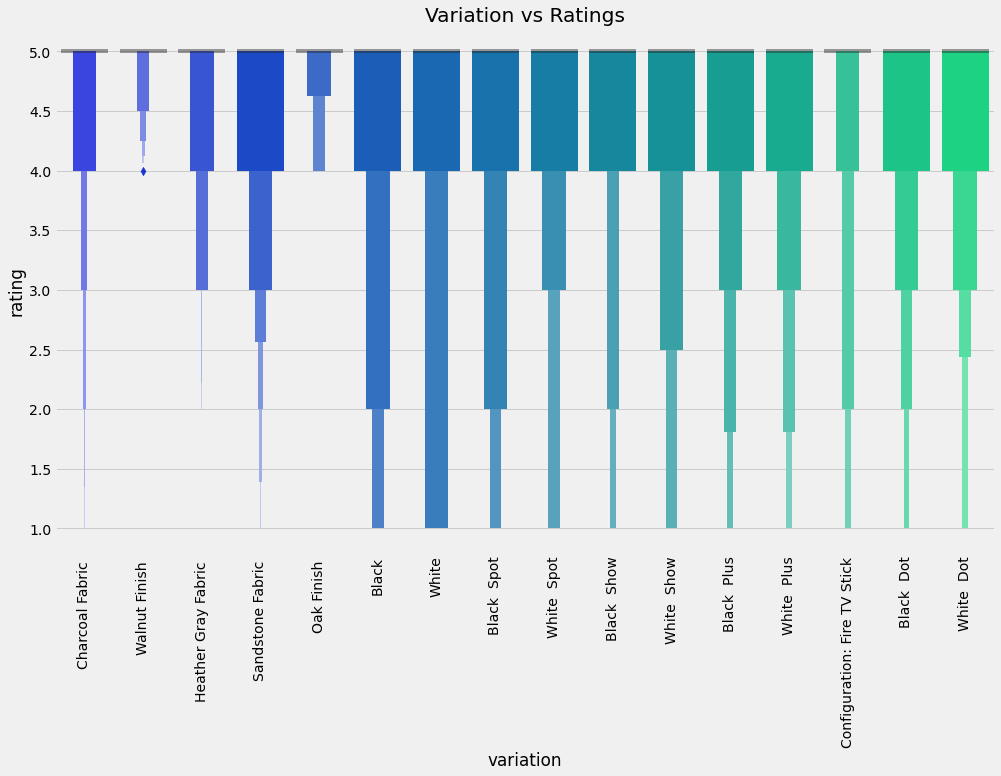

In [21]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['variation'], data['rating'], palette = 'winter')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

Even though Walnut Finish and Oak Finish were the least popular variations of Alexa according to #10, they have very high ratings ranging from 4.5 to 5 stars. It shows that these Alexa variations are not very common among its customers, however, they have very positive ratings.

The darker variations of Alexa, such as the Black variation model, have some negative ratings. We can infer this conclusion because of its popularity among the different Alexa model variations. Thus, due to the majority of customers owning this variation, it will have some negative reviews, even though most of them are positive.

The White model besides being one of the least popular variation models according to #10, it is also one of the models that have the most negative ratings. We can see that there is a substantial number of ratings below 3 stars for the White model, especially below 2 stars.

<h3> Variation vs Length of Ratings </h3>

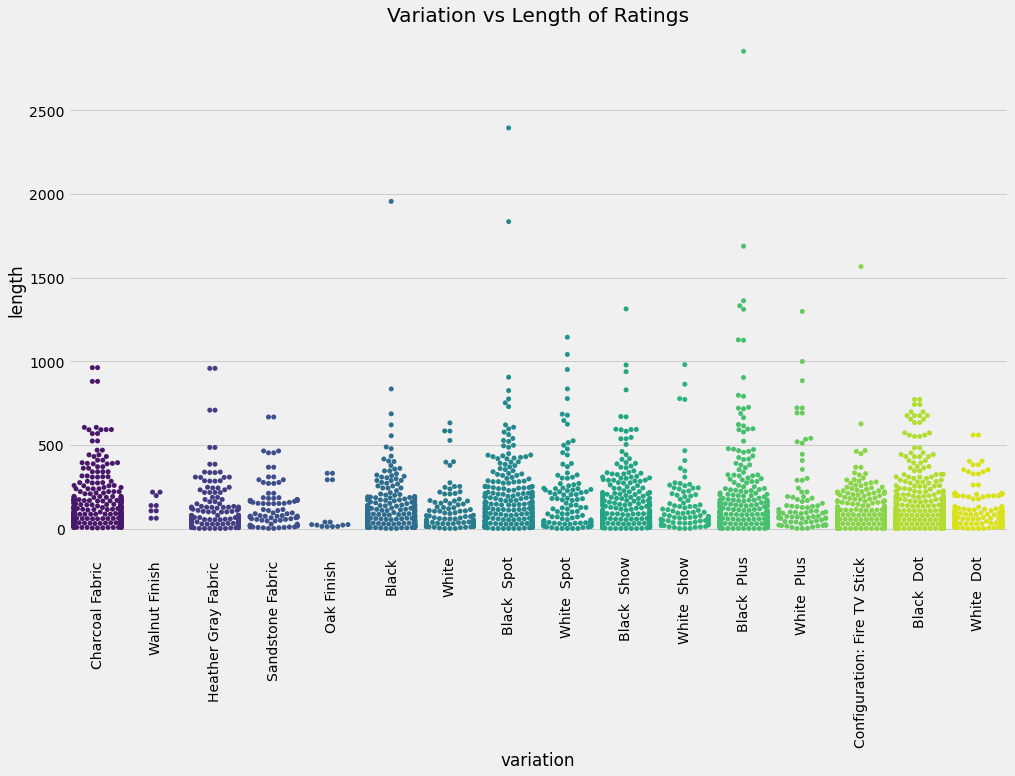

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'viridis')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

The Bivariate plot above shows the swarmplot between “variation” and “length” of Amazon’s Alexa reviews. In this case, we are looking for which model variation of Alexa’s customers have written the longest and shortest reviews.

By looking at the graph, we can spot that the longest reviews were written by customers who own the Black Plus model, with the longest reviews with almost 3 thousand characters (including white space).

Dissatisfied customers usually tend to leave long reviews explaining their reasons for not liking the product. Based on that, I was hoping to see long reviews for the White model since the ratings were low in this particular model accordingly with the previous graph. However, that was not the case. The reviews for the White model were relatively short when compared with other models.

<h3> Feedback vs Ratings </h3>

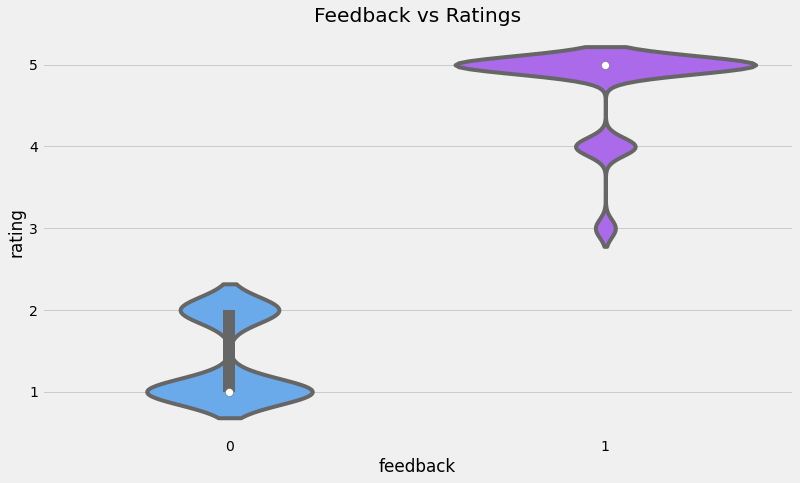

In [23]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("Feedback vs Ratings")
plt.show()

The Bivariate plot above is a violin plot between Feedback and Rating. We can conclude from the graph that the Alexa reviews that have 0 feedback have lower ratings ranging from 1 to 2 stars, but mostly 1 star only. Whereas the Alexa reviews having a feedback equal 1 have higher ratings between 3 to 5 stars. According to the graph, the majority of the feedback reviews was a 5-star rating.

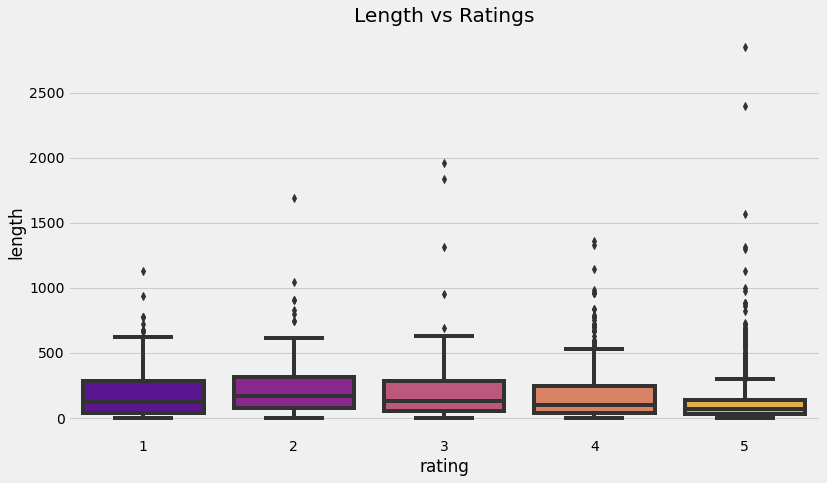

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'plasma')
plt.title("Length vs Ratings")
plt.show()

The Bivariate plot shows the relationship between length and rating. Here we are looking how long the customer reviews are based on their rating. It is worth noting that all the reviews have pretty similar lengths regardless of their rating. However, there’s a clear difference between the length of low rating reviews and high rating reviews.

According to the graph and as previously mentioned, low rating reviews tend to be longer than high rating reviews. Most of the customers that gave Alexa 5-stars wrote smaller reviews than customers that gave 1 or 2-stars. That might be due to the fact that unsatisfied customers feel the need to explain the reasons for not liking the product. While satisfied customers feel happy, hence do not feel the same urgency to write long reviews.

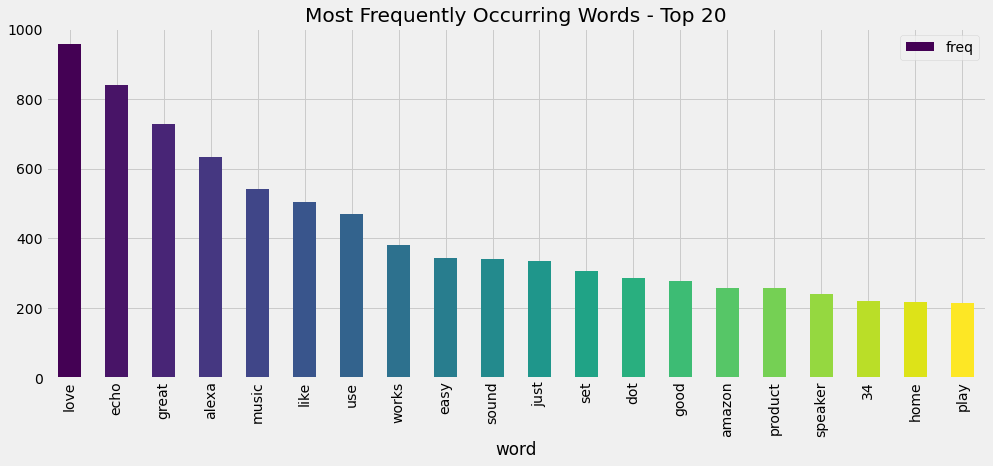

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.viridis(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()

The bar plot represents que most frequent words among all of the reviews analyzed from the customers. By looking at the graph, we can have a good idea on how the customers think and feel regarding Amazon’s Alexa.

The words “love” and “great” are two of the most frequent words among all of the reviews which suggests that most customers had very positive feelings towards Alexa. This is foreseen since 91.8% (#11) of the reviews had a positive rating. Other frequent words that suggest Alexa is doing well are “amazing”, “like”, “easy”, “works”, and “good”.

<h3> Vocabulary from Reviews </h3>

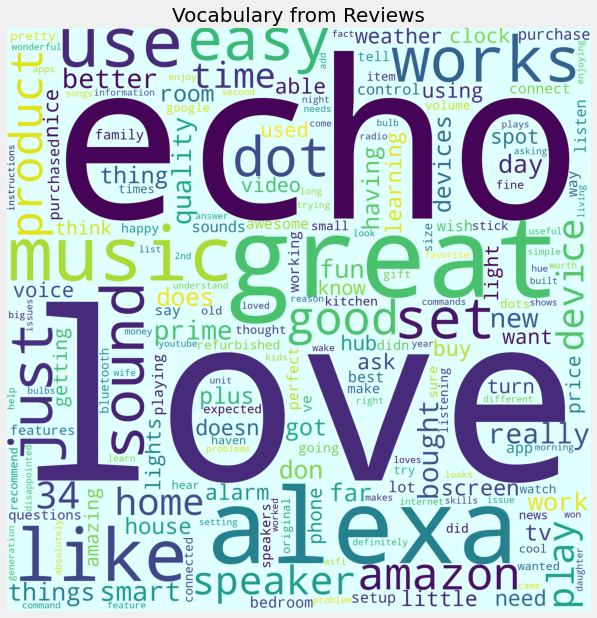

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<h3> Feedback vs Length </h3>

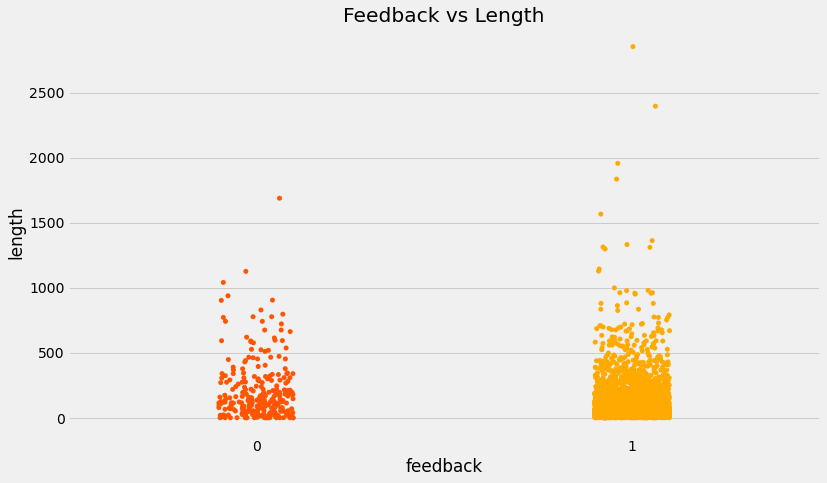

In [28]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'autumn')
plt.title("Feedback vs Length")
plt.show()

The Bivariate graph above shows the relationship between feedback and length. We notice that there is a lot more positive feedback than negative feedback. This makes sense since the majority of customers had a positive rating towards Alexa. We also notice that the length of positive feedbacks is greater than the negatives one. This might be due to the total number of positive feedback reviews greatly surpassing the number of negative feedback reviews.

Customers that are satisfied with Alexa wrote longer reviews than customers that did not like Alexa as much.

In [29]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    # cleaning the text

In [33]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [36]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
accuracy_score_rf=accuracy_score(y_test,y_pred_rf)
print("Decision Tree Accuracy=",accuracy_score_rf)
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

Decision Tree Accuracy= 0.9412698412698413

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.48        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.97      0.66      0.72       630
weighted avg       0.94      0.94      0.93       630



In [37]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rf)
print(cm_rfc)
TP_rfc = cm_rfc[0][0]
FP_rfc = cm_rfc[0][1]
TN_rfc = cm_rfc[1][1]
FN_rfc = cm_rfc[1][0]
print()    
print('Success Rate = ',(TP_rfc+TN_rfc)/(TP_rfc+TN_rfc+FN_rfc+FP_rfc))
print('Misclassificate Rate = ',(FP_rfc+FN_rfc)/(TP_rfc+TN_rfc+FN_rfc+FP_rfc))
print('Sensitivity/tp_rate = ', TP_rfc/(TP_rfc+FN_rfc))
print('Specificity/tn_rate = ', TN_rfc/(TN_rfc+FP_rfc))
print('fp rate = ',FP_rfc/(TN_rfc+FP_rfc))
print('fn rate = ',FN_rfc/(TP_rfc+FN_rfc))
print()

[[ 17  37]
 [  0 576]]

Success Rate =  0.9412698412698413
Misclassificate Rate =  0.05873015873015873
Sensitivity/tp_rate =  1.0
Specificity/tn_rate =  0.9396411092985318
fp rate =  0.06035889070146819
fn rate =  0.0



In [38]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred_dc=dc.predict(X_test)
accuracy_score_dc=accuracy_score(y_test,y_pred_dc)
print("Decision Tree Accuracy=",accuracy_score_dc)
print('\nClassification Report:\n', classification_report(y_test, y_pred_dc))

Decision Tree Accuracy= 0.9349206349206349

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.46      0.55        54
           1       0.95      0.98      0.96       576

    accuracy                           0.93       630
   macro avg       0.81      0.72      0.76       630
weighted avg       0.93      0.93      0.93       630



In [39]:
cm_dt = confusion_matrix(y_test, y_pred_dc)
print(cm_dt)
print()
TP_dt = cm_dt[0][0]
FP_dt = cm_dt[0][1]
TN_dt = cm_dt[1][1]
FN_dt = cm_dt[1][0]
print('Success Rate = ',(TP_dt+TN_dt)/(TP_dt+TN_dt+FN_dt+FP_dt))
print('Misclassificate Rate = ',(FP_dt+FN_dt)/(TP_dt+TN_dt+FN_dt+FP_dt))
print('Sensitivity/tp_rate = ', TP_dt/(TP_dt+FN_dt))
print('Specificity/tn_rate = ', TN_dt/(TN_dt+FP_dt))
print('fp rate = ',FP_dt/(TN_dt+FP_dt))
print('fn rate = ',FN_dt/(TP_dt+FN_dt))

[[ 25  29]
 [ 12 564]]

Success Rate =  0.9349206349206349
Misclassificate Rate =  0.06507936507936508
Sensitivity/tp_rate =  0.6756756756756757
Specificity/tn_rate =  0.9510961214165261
fp rate =  0.048903878583473864
fn rate =  0.32432432432432434


In [51]:
# SVM
from sklearn import svm
sv=svm.SVC(probability = True)
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
accuracy_score_sv=accuracy_score(y_test,y_pred_sv)
print("SVM accuracy=",accuracy_score_sv)
print('\nClassification Report:\n', classification_report(y_test, y_pred_sv))

SVM accuracy= 0.9253968253968254

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.13      0.23        54
           1       0.92      1.00      0.96       576

    accuracy                           0.93       630
   macro avg       0.96      0.56      0.60       630
weighted avg       0.93      0.93      0.90       630



In [52]:
cm_svm = confusion_matrix(y_test, y_pred_sv)
print(cm_svm)
print()
TP_svm = cm_svm[0][0]
FP_svm = cm_svm[0][1]
TN_svm = cm_svm[1][1]
FN_svm = cm_svm[1][0]
    
print('Success Rate = ',(TP_svm+TN_svm)/(TP_svm+TN_svm+FN_svm+FP_svm))
print('Misclassificate Rate = ',(FP_svm+FN_svm)/(TP_svm+TN_svm+FN_svm+FP_svm))
print('Sensitivity/tp_rate = ', TP_svm/(TP_svm+FN_svm))
print('Specificity/tn_rate = ', TN_svm/(TN_svm+FP_svm))
print('fp rate = ',FP_svm/(TN_svm+FP_svm))
print('fn rate = ',FN_svm/(TP_svm+FN_svm))

[[  7  47]
 [  0 576]]

Success Rate =  0.9253968253968254
Misclassificate Rate =  0.0746031746031746
Sensitivity/tp_rate =  1.0
Specificity/tn_rate =  0.9245585874799358
fp rate =  0.0754414125200642
fn rate =  0.0


In [53]:
print("Decision Tree Accuracy =",accuracy_score_dc)
print("Random Forest Accuracy=",accuracy_score_rf)
print("SVM accuracy Accuracy=",accuracy_score_sv)

Decision Tree Accuracy = 0.9349206349206349
Random Forest Accuracy= 0.9412698412698413
SVM accuracy Accuracy= 0.9253968253968254


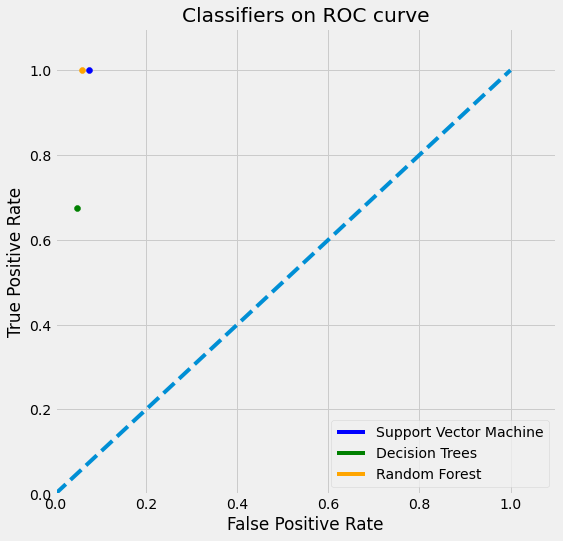

In [64]:
from sklearn import metrics
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.plot([0, 1], [0, 1], ls="--")
colors = ("blue","green","orange")
tp_array = [TP_svm/(TP_svm+FN_svm),TP_dt/(TP_dt+FN_dt),TP_rfc/(TP_rfc+FN_rfc)]
fp_array = [FP_svm/(TN_svm+FP_svm), FP_dt/(TN_dt+FP_dt),FP_rfc/(FP_rfc+TN_rfc)]
for x,y,color in zip(tp_array,fp_array,colors):
    plt.scatter(y,x,c=color)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Classifiers on ROC curve')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
ax1.plot(tp_array[0], fp_array[0] , label= "Support Vector Machine" , color = "blue")
ax1.plot(tp_array[2], fp_array[2] , label= "Decision Trees", color = "green")
ax1.plot(tp_array[1], fp_array[1] , label= "Random Forest", color = "orange")
ax1.legend(loc="lower right")
plt.show()

In [61]:
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
print("Support Vector Machine AUC = ",roc_auc_svm)
print("Decision Trees AUC = ",roc_auc_dt)
print("Random Forest AUC = ",roc_auc_rfc)

Support Vector Machine AUC =  0.9258937757201646
Decision Trees AUC =  0.7492766203703703
Random Forest AUC =  0.939477237654321


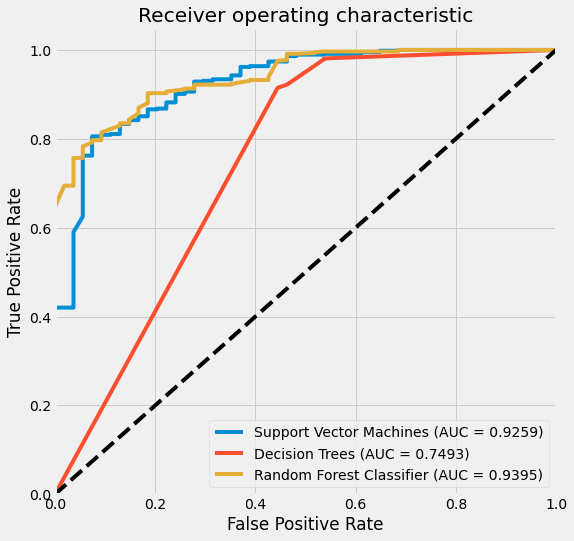

In [66]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
svm_probs = sv.predict_proba(X_test)
dt_probs = dc.predict_proba(X_test)
rfc_probs = classifier.predict_proba(X_test)

preds_svm = svm_probs[:,1]
preds_dt = dt_probs[:,1]
preds_rfc = rfc_probs[:,1]

fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(y_test, preds_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characterstics')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (AUC = %0.4f)' % (roc_auc_svm))
plt.plot(fpr_dt, tpr_dt, label='Decision Trees (AUC = %0.4f)' % (roc_auc_dt))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (AUC = %0.4f)' % (roc_auc_rfc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")